# 

### Projet realisé par :

- CORROLLER NATHAN p2208035
- ABIDA YOUSSEF p2024398

# Imports

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import gzip
import numpy
import matplotlib.pyplot as plt
from itertools import product
import inspect

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


# Part 1 : Perceptron

- **data_train** : Ce tenseur correspond aux données d'entrainement, de taille (63000, 784). Cela correspond à 63000 images et 784 pixels par image, mis à plat dans des vecteurs.
- **label_train** : Ce tenseur correspond aux labels d'entrainement, de taille (63000, 10). Chaque ligne correspond au label one-hot de l'image, et les 10 colonnes correspondent aux 10 classes (chiffres 0-9).
- **data_test** : Ce tenseur correspond aux données de test, de taille (7000, 784). Cela correspond à 7000 images aplaties en vecteurs de 784 pixels.
- **label_test** : Ce tenseur correspond aux labels de test, de taille (7000, 10). Chaque ligne correspond au label one-hot d'une image de test.
- **w** : Tenseur de poids (784, 10). Chaque colonne contient les poids appliqués aux 784 pixels pour un neurone de sortie spécifique.
- **b** : Tenseur de biais (1, 10), une valeur par neurone de sortie.
- **x** : Tenseur des données d'entrée.  
  - Sur les données d'entraînement : (5, 784), car on prend un batch de 5 images.  
  - Sur les données de test : (1, 784), car on traite une image à la fois.  
- **y** : Tenseur de sortie du modèle. Chaque valeur dans y correspond à l’activation d’un neurone de sortie. Dans ce projet, il y a 10 neurones, un par classe (0-9). La sortie complète y est donc un vecteur de 10 valeurs par image.
  - Sur les données d'entraînement : (5, 10), prédictions du modèle pour 5 images.  
  - Sur les données de test : (1, 10), prédiction pour une seule image.  
- **t** : Tenseur des labels cibles.  
  - Sur l'entraînement : (5, 10), labels one-hot des 5 images d'entrée.  
  - Sur le test : (1, 10), label one-hot de l'image en entrée.  
- **grad** : Tenseur de gradient, de taille (5, 10) pendant l'entraînement. Il correspond à la différence entre le label cible `t` et la sortie prédite `y`, et sert à la mise à jour des poids et biais.


In [16]:
batch_size = 5  # nombre de données lues à chaque fois
nb_epochs = 10  # nombre de fois que la base de données sera lue
eta = 0.00001  # taux d'apprentissage

# on lit les données
((data_train, label_train), (data_test, label_test)
    ) = torch.load(gzip.open('mnist.pkl.gz'))

# on initialise le modèle et ses poids
w = torch.empty(
    (data_train.shape[1], label_train.shape[1]), dtype=torch.float)
b = torch.empty((1, label_train.shape[1]), dtype=torch.float)
nn.init.uniform_(w, -0.001, 0.001)
nn.init.uniform_(b, -0.001, 0.001)

nb_data_train = data_train.shape[0]
nb_data_test = data_test.shape[0]
indices = numpy.arange(nb_data_train)
for n in range(nb_epochs):
    # on mélange les (indices des) données
    numpy.random.shuffle(indices)
    # on lit toutes les (indices des) données d'apprentissage
    for i in range(0, nb_data_train, batch_size):
        # on récupère les entrées
        x_train = data_train[indices[i:i+batch_size]]
        # print(f" x shape only	: {x.shape}")

        # on calcule la sortie du modèle
        y_train = torch.mm(x_train, w)+b
        # print(f" y shape only	: {y.shape}")
        # on regarde les vrais labels
        t_train = label_train[indices[i:i+batch_size]]
        # print(f" t shape only	: {t.shape}")
        # on met à jour les poids
        grad = (t_train-y_train)
        # print(f" grad shape only	: {grad.shape}")

        w += eta * torch.mm(x_train.T, grad)
        # print(f" w shape update	: {w.shape}")
        b += eta * grad.sum(axis=0)
        # print(f" b shape update	: {b.shape}")

    # test du modèle (on évalue la progression pendant l'apprentissage)
    acc = 0.
    # on lit toutes les donnéees de test
    for i in range(nb_data_test):
        # on récupère l'entrée
        x_test = data_test[i:i+1]
        # on calcule la sortie du modèle
        y_test = torch.mm(x_test, w)+b
        # on regarde le vrai label
        t_test = label_test[i:i+1]
        # on regarde si la sortie est correcte
        acc += torch.argmax(y_test, 1) == torch.argmax(t_test, 1)
    # on affiche le pourcentage de bonnes réponses
    print(acc/nb_data_test)


tensor([0.8034])
tensor([0.8243])
tensor([0.8343])
tensor([0.8406])
tensor([0.8453])
tensor([0.8484])
tensor([0.8510])
tensor([0.8531])
tensor([0.8509])
tensor([0.8527])


In [17]:
# Je verifie les tenseurs de data_train et label_train
print(f"data_train shape: {data_train.shape}, label_train shape: {label_train.shape}")
print(f"data_train type: {type(data_train)}, label_train type: {type(label_train)}")

data_train shape: torch.Size([63000, 784]), label_train shape: torch.Size([63000, 10])
data_train type: <class 'torch.Tensor'>, label_train type: <class 'torch.Tensor'>


In [18]:
# Je verifie les tenseurs de data_test et label_test
print(f"data_test shape: {data_test.shape}, label_test shape: {label_test.shape}")
print(f"data_test type: {type(data_test)}, label_test type: {type(label_test)}")

data_test shape: torch.Size([7000, 784]), label_test shape: torch.Size([7000, 10])
data_test type: <class 'torch.Tensor'>, label_test type: <class 'torch.Tensor'>


In [19]:
# Je verifie les tenseurs w et b
print(f"w shape: {w.shape}, b shape: {b.shape}")
print(f"w type: {type(w)}, b type: {type(b)}")

w shape: torch.Size([784, 10]), b shape: torch.Size([1, 10])
w type: <class 'torch.Tensor'>, b type: <class 'torch.Tensor'>


In [20]:
# Je verifie les tenseurs x, y, t et grad sur train
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, t_train shape: {t_train.shape}, grad shape: {grad.shape}")
print(f"x_train type: {type(x_train)}, y_train type: {type(y_train)}, t_train type: {type(t_train)}, grad type: {type(grad)}")

x_train shape: torch.Size([5, 784]), y_train shape: torch.Size([5, 10]), t_train shape: torch.Size([5, 10]), grad shape: torch.Size([5, 10])
x_train type: <class 'torch.Tensor'>, y_train type: <class 'torch.Tensor'>, t_train type: <class 'torch.Tensor'>, grad type: <class 'torch.Tensor'>


In [21]:
# Je verifie les tenseurs x, y et t sur test
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}, t_test shape: {t_test.shape}")
print(f"x_test type: {type(x_test)}, y_test type: {type(y_test)}, t_test type: {type(t_test)}")

x_test shape: torch.Size([1, 784]), y_test shape: torch.Size([1, 10]), t_test shape: torch.Size([1, 10])
x_test type: <class 'torch.Tensor'>, y_test type: <class 'torch.Tensor'>, t_test type: <class 'torch.Tensor'>


# Part 2 : Shallow

In [22]:
class ShallowNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=512):
        super(ShallowNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

    def train_model(
            self, 
            device, 
            data_train, 
            label_train, 
            criterion, 
            data_val=None, 
            label_val=None,
            batch_size=32, 
            np_epochs=10, 
            eta=0.001,
            optimizer=None
        ):

        data_train = data_train.to(device)
        label_train = label_train.to(device)
        if data_val is not None:
            data_val = data_val.to(device)
            label_val = label_val.to(device)

        if optimizer is None:
            optimizer = torch.optim.Adam(self.parameters(), lr=eta)

        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []

        nb_data_train = data_train.shape[0]

        for epoch in range(np_epochs):
            permutation = torch.randperm(nb_data_train, device=device)
            epoch_loss = 0.0
            correct = 0
            total = 0

            for i in range(0, nb_data_train, batch_size):
                indices = permutation[i:i+batch_size]
                x_batch = data_train[indices]
                t_batch = label_train[indices]

                optimizer.zero_grad()
                y_pred = self.forward(x_batch)
                loss = criterion(y_pred, t_batch)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item() * x_batch.size(0)
                pred = torch.argmax(y_pred, dim=1)
                target = torch.argmax(t_batch, dim=1)
                correct += (pred == target).sum().item()
                total += x_batch.size(0)

            avg_loss = epoch_loss / nb_data_train
            accuracy = correct / total
            train_losses.append(avg_loss)
            train_accuracies.append(accuracy)

            if data_val is not None:
                val_loss, val_acc = self.evaluate_model(
                    device, data_val, label_val, criterion)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)
                print(f"Epoch {epoch+1}/{np_epochs} - "
                      f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
            else:
                print(
                    f"Epoch {epoch+1}/{np_epochs} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}")

        return train_losses, train_accuracies, val_losses, val_accuracies

    def evaluate_model(self, device, data, label, criterion):
        self.eval()
        with torch.no_grad():
            y_pred = self.forward(data.to(device))
            loss = criterion(y_pred, label.to(device)).item()
            pred = torch.argmax(y_pred, dim=1)
            target = torch.argmax(label.to(device), dim=1)
            acc = (pred == target).sum().item() / data.size(0)
        self.train()
        return loss, acc

    def test_model(self, device, data_test, label_test, criterion):
        data_test = data_test.to(device)
        label_test = label_test.to(device)
        loss, acc = self.evaluate_model(
            device, data_test, label_test, criterion)
        print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


In [23]:
((data_train, label_train), (data_test, label_test)
 ) = torch.load(gzip.open('mnist.pkl.gz'))

data_train = data_train.to(device)
label_train = label_train.to(device)
data_test = data_test.to(device)
label_test = label_test.to(device)

len_train = data_train.shape[0]
len_test = data_test.shape[0]
len_dataset = len_train + len_test

# taille de la validation = 10% du dataset total
val_size = len_dataset // 10
train_size = len_train - val_size

indices = torch.randperm(len_train, device=device)
data_train = data_train[indices]
label_train = label_train[indices]

# on divise les données
data_train, data_validation = torch.split(data_train, [train_size, val_size])
label_train, label_validation = torch.split(
    label_train, [train_size, val_size])

data_validation = data_validation.to(device)
label_validation = label_validation.to(device)

print(f"Train : {data_train.shape}, {label_train.shape}")
print(f"Val   : {data_validation.shape}, {label_validation.shape}")
print(f"Test  : {data_test.shape}, {label_test.shape}")

Train : torch.Size([56000, 784]), torch.Size([56000, 10])
Val   : torch.Size([7000, 784]), torch.Size([7000, 10])
Test  : torch.Size([7000, 784]), torch.Size([7000, 10])


In [24]:
def plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses):
    epochs = range(1, len(train_accuracies) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

##### Test avec SGD + criterion MSELoss avec le ShallowNetwork

In [25]:
input_size = data_train.shape[1]
output_size = label_train.shape[1]

nb_epochs = 30
batch_size = 10
eta = 0.08
hidden_size = 768


criterion = nn.MSELoss()
shallow_network = ShallowNetwork(input_size, output_size, hidden_size=hidden_size).to(device)
optimizer = torch.optim.SGD(shallow_network.parameters(), lr=eta)


In [26]:
# Entraînement du réseau de neurones peu profond et récupération des courbes
train_losses, train_accuracies, val_losses, val_accuracies = shallow_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta, optimizer=optimizer
)

Epoch 1/30 - Train Loss: 0.0250, Train Acc: 0.9092, Val Loss: 0.0171, Val Acc: 0.9414
Epoch 2/30 - Train Loss: 0.0146, Train Acc: 0.9543, Val Loss: 0.0138, Val Acc: 0.9554
Epoch 3/30 - Train Loss: 0.0122, Train Acc: 0.9643, Val Loss: 0.0121, Val Acc: 0.9627
Epoch 4/30 - Train Loss: 0.0107, Train Acc: 0.9699, Val Loss: 0.0111, Val Acc: 0.9646
Epoch 5/30 - Train Loss: 0.0098, Train Acc: 0.9742, Val Loss: 0.0104, Val Acc: 0.9679
Epoch 6/30 - Train Loss: 0.0090, Train Acc: 0.9772, Val Loss: 0.0099, Val Acc: 0.9694
Epoch 7/30 - Train Loss: 0.0085, Train Acc: 0.9795, Val Loss: 0.0095, Val Acc: 0.9709
Epoch 8/30 - Train Loss: 0.0080, Train Acc: 0.9809, Val Loss: 0.0091, Val Acc: 0.9726
Epoch 9/30 - Train Loss: 0.0076, Train Acc: 0.9824, Val Loss: 0.0089, Val Acc: 0.9729
Epoch 10/30 - Train Loss: 0.0072, Train Acc: 0.9836, Val Loss: 0.0085, Val Acc: 0.9740
Epoch 11/30 - Train Loss: 0.0069, Train Acc: 0.9848, Val Loss: 0.0084, Val Acc: 0.9746
Epoch 12/30 - Train Loss: 0.0066, Train Acc: 0.9861,

KeyboardInterrupt: 

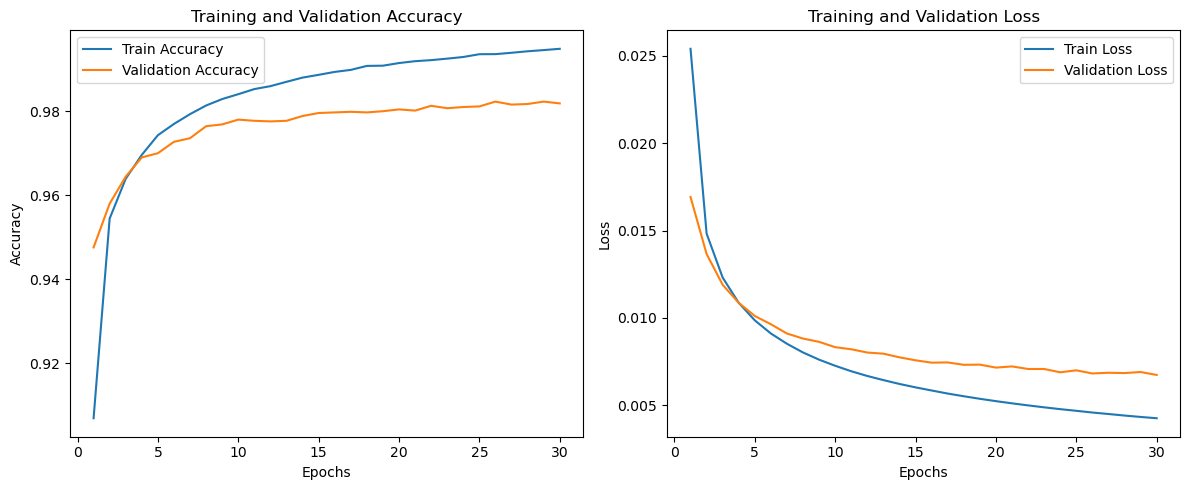

In [ ]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [ ]:
shallow_network.test_model(device, data_test, label_test, criterion)

##### Test avec Adam + criterion CrossEntropyLoss avec le ShallowNetwork

In [23]:
input_size = data_train.shape[1] #784 28x28 images aplaties
output_size = label_train.shape[1] # 10 classes (0-9)

hidden_size = 512
batch_size = 64
nb_epochs = 20
eta = 1e-3

criterion = nn.CrossEntropyLoss()
shallow_network = ShallowNetwork(input_size, output_size, hidden_size).to(device)
optimizer = torch.optim.Adam(shallow_network.parameters(), lr=eta)

In [24]:
# Entraînement du réseau de neurones peu profond et récupération des courbes
train_losses, train_accuracies, val_losses, val_accuracies = shallow_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta, optimizer=optimizer
)

Epoch 1/20 - Train Loss: 0.2653, Train Acc: 0.9249, Val Loss: 0.1541, Val Acc: 0.9557
Epoch 2/20 - Train Loss: 0.1010, Train Acc: 0.9696, Val Loss: 0.1024, Val Acc: 0.9714
Epoch 3/20 - Train Loss: 0.0649, Train Acc: 0.9803, Val Loss: 0.0793, Val Acc: 0.9770
Epoch 4/20 - Train Loss: 0.0450, Train Acc: 0.9862, Val Loss: 0.0839, Val Acc: 0.9771
Epoch 5/20 - Train Loss: 0.0322, Train Acc: 0.9903, Val Loss: 0.0819, Val Acc: 0.9780
Epoch 6/20 - Train Loss: 0.0241, Train Acc: 0.9925, Val Loss: 0.0771, Val Acc: 0.9801
Epoch 7/20 - Train Loss: 0.0178, Train Acc: 0.9948, Val Loss: 0.0837, Val Acc: 0.9777
Epoch 8/20 - Train Loss: 0.0145, Train Acc: 0.9957, Val Loss: 0.0833, Val Acc: 0.9799
Epoch 9/20 - Train Loss: 0.0104, Train Acc: 0.9970, Val Loss: 0.0866, Val Acc: 0.9780
Epoch 10/20 - Train Loss: 0.0131, Train Acc: 0.9959, Val Loss: 0.0892, Val Acc: 0.9800
Epoch 11/20 - Train Loss: 0.0090, Train Acc: 0.9968, Val Loss: 0.0857, Val Acc: 0.9826
Epoch 12/20 - Train Loss: 0.0056, Train Acc: 0.9983,

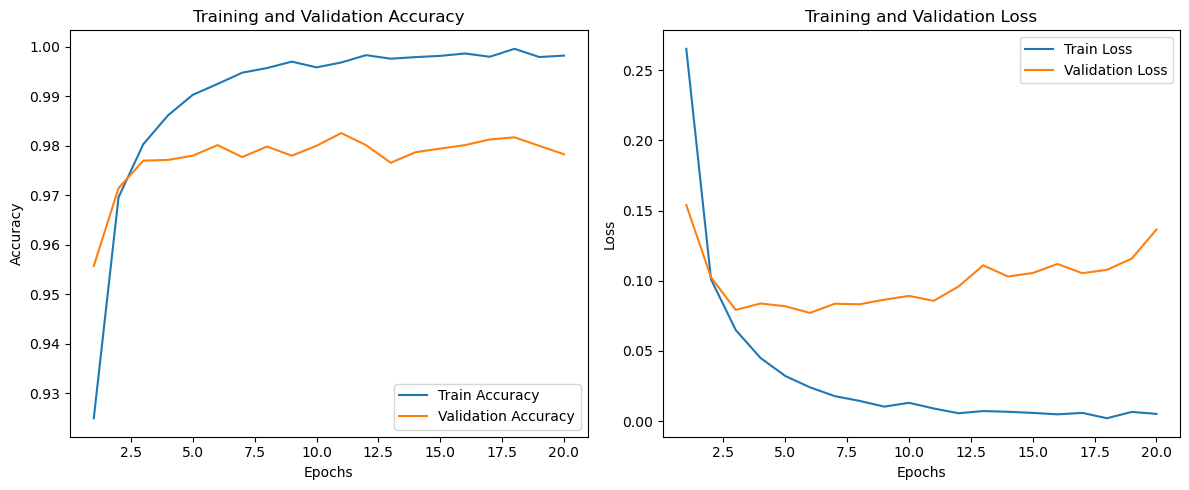

In [25]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [26]:
# Test sur le jeu de test
shallow_network.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9783, Test Loss: 0.1077


Pour trouver les meilleurs hyperparamètres, nous avons décidé de faire une recherche par grille (grid search) en testant différentes combinaisons de taux d'apprentissage (learning rate) et de tailles de batch (batch size). Nous avons testé les valeurs suivantes :


## Grid Search

In [58]:
class GridSearch:
    def __init__(self, model_class, param_grid, 
                 data_train, label_train, data_validation, label_validation, 
                 data_test, label_test, criterion, device, showGraph=False):
        self.model_class = model_class
        self.param_grid = param_grid
        self.data_train = data_train
        self.label_train = label_train
        self.data_validation = data_validation
        self.label_validation = label_validation
        self.data_test = data_test
        self.label_test = label_test
        self.criterion = criterion
        self.device = device

        self.input_size = data_train.shape[1]
        self.output_size = label_train.shape[1]
        self.showGraph = showGraph

    def _create_param_combinations(self):
        """
        Crée toutes les combinaisons de paramètres possibles.
        """
        keys = list(self.param_grid.keys())
        values = list(self.param_grid.values())
        return [dict(zip(keys, v)) for v in product(*values)]

    def _split_params(self, params):
        """
        Split parameters between model constructor and training.
        """
        # Get the constructor argument names dynamically
        constructor_args = inspect.signature(self.model_class.__init__).parameters
        model_params = {}
        train_params = {}

        for k, v in params.items():
            if k in constructor_args:
                model_params[k] = v
            else:
                train_params[k] = v
        return model_params, train_params

    def fit(self):
        best_acc = 0
        best_param_comb= None

        param_comb = self._create_param_combinations()
        for params in param_comb:

            print("Testing model with params : " + params.__str__())
            model_params, train_params = self._split_params(params)

            try:
                if self.input_size and "input_size" in inspect.signature(self.model_class.__init__).parameters:
                    model_params.setdefault("input_size", self.input_size)
                    model_params.setdefault("output_size", self.output_size)
                model = self.model_class(**model_params).to(self.device)
            except TypeError as e:
                print(f"❌ Could not instantiate model: {e}")
                continue

            opt_name = train_params.get("optimizer", "Adam")
            eta = train_params.get("eta", 0.001)
            optimizer = getattr(optim, opt_name)(model.parameters(), lr=eta)

            #Lancement de l'entrainement avec la combinaison de paramètre "params"
            train_losses, train_accuracies, val_losses, val_accuracies = model.train_model(
                device=self.device,
                data_train=self.data_train,
                label_train=self.label_train,
                criterion=self.criterion,
                data_val=self.data_validation,
                label_val=self.label_validation,
                batch_size=params.get("batch_size"),
                np_epochs=params.get("nb_epochs"),
                eta=eta,
                optimizer=optimizer
            )

            last_valid_acc = val_accuracies[-1]
            if last_valid_acc > best_acc:
                best_acc = last_valid_acc
                best_param_comb = params
                print(best_acc)
                print(best_param_comb)

            if self.showGraph:
                plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

        print("La meilleure des combinaisons est ", best_param_comb)
        print("La meilleur moyenne de validation set est de ", best_acc)


In [ ]:
param_grid = {
    'eta': [0.08, 0.3],
    'batch_size': [10,30,64],
    'nb_epochs': [30, 20],
    'hidden_size': [784, 512, 1024],
    }

shallow_network_grid_search = GridSearch(ShallowNetwork, param_grid, data_train, label_train, data_validation, label_validation, data_test, label_test, criterion, device, True)
shallow_network_grid_search.fit()

Testing model with params : {'eta': 0.08, 'batch_size': 10, 'nb_epochs': 30, 'hidden_size': 784}
Epoch 1/30 - Train Loss: 1.7443, Train Acc: 0.4681, Val Loss: 1.6623, Val Acc: 0.4430


KeyboardInterrupt: 

# Part 3: Deep Network

In [27]:
class DeepNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes=[512, 256, 128]):
        super(DeepNetwork, self).__init__()
        layers = []
        in_size = input_size
        for h_size in hidden_sizes:
            layers.append(nn.Linear(in_size, h_size))
            layers.append(nn.ReLU())
            in_size = h_size
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)
    
    def train_model(
            self, 
            device, 
            data_train, 
            label_train, 
            criterion,
            data_val=None, 
            label_val=None,
            batch_size=32, 
            np_epochs=10, 
            eta=0.001,
            optimizer=None,
        ):
        
        data_train = data_train.to(device)
        label_train = label_train.to(device)
        if data_val is not None:
            data_val = data_val.to(device)
            label_val = label_val.to(device)

        if optimizer is None:
            optimizer = torch.optim.Adam(self.parameters(), lr=eta)

        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []

        nb_data_train = data_train.shape[0]

        for epoch in range(np_epochs):
            permutation = torch.randperm(nb_data_train, device=device)
            epoch_loss = 0.0
            correct = 0
            total = 0

            for i in range(0, nb_data_train, batch_size):
                indices = permutation[i:i+batch_size]
                x_batch = data_train[indices]
                t_batch = label_train[indices]

                optimizer.zero_grad()
                y_pred = self.forward(x_batch)
                loss = criterion(y_pred, t_batch)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item() * x_batch.size(0)
                pred = torch.argmax(y_pred, dim=1)
                target = torch.argmax(t_batch, dim=1)
                correct += (pred == target).sum().item()
                total += x_batch.size(0)

            avg_loss = epoch_loss / nb_data_train
            accuracy = correct / total
            train_losses.append(avg_loss)
            train_accuracies.append(accuracy)

            if data_val is not None:
                val_loss, val_acc = self.evaluate_model(
                    device, data_val, label_val, criterion)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)
                print(f"Epoch {epoch+1}/{np_epochs} - "
                      f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
            else:
                print(
                    f"Epoch {epoch+1}/{np_epochs} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}")

        return train_losses, train_accuracies, val_losses, val_accuracies
    
    def evaluate_model(self, device, data, label, criterion):
        self.eval()
        with torch.no_grad():
            y_pred = self.forward(data.to(device))
            loss = criterion(y_pred, label.to(device)).item()
            pred = torch.argmax(y_pred, dim=1)
            target = torch.argmax(label.to(device), dim=1)
            acc = (pred == target).sum().item() / data.size(0)
        self.train()
        return loss, acc
    
    def test_model(self, device, data_test, label_test, criterion):
        data_test = data_test.to(device)
        label_test = label_test.to(device)
        loss, acc = self.evaluate_model(
            device, data_test, label_test, criterion)
        print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

input_size = data_train.shape[1]
output_size = label_train.shape[1]
batch_size = 32
eta = 0.01
nb_epochs = 30

criterion = nn.MSELoss()
deep_network = DeepNetwork(input_size, output_size, hidden_sizes=[512, 256, 128]).to(device)
optimizer = torch.optim.Adam(deep_network.parameters(), lr=eta)

Using device: cuda


In [29]:
train_losses, train_accuracies, val_losses, val_accuracies = deep_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta
)

Epoch 1/30 - Train Loss: 0.0183, Train Acc: 0.9058, Val Loss: 0.0122, Val Acc: 0.9323
Epoch 2/30 - Train Loss: 0.0114, Train Acc: 0.9376, Val Loss: 0.0121, Val Acc: 0.9306
Epoch 3/30 - Train Loss: 0.0106, Train Acc: 0.9425, Val Loss: 0.0113, Val Acc: 0.9339
Epoch 4/30 - Train Loss: 0.0098, Train Acc: 0.9456, Val Loss: 0.0109, Val Acc: 0.9366
Epoch 5/30 - Train Loss: 0.0094, Train Acc: 0.9481, Val Loss: 0.0108, Val Acc: 0.9386
Epoch 6/30 - Train Loss: 0.0091, Train Acc: 0.9499, Val Loss: 0.0118, Val Acc: 0.9360
Epoch 7/30 - Train Loss: 0.0086, Train Acc: 0.9531, Val Loss: 0.0106, Val Acc: 0.9400
Epoch 8/30 - Train Loss: 0.0087, Train Acc: 0.9522, Val Loss: 0.0098, Val Acc: 0.9441
Epoch 9/30 - Train Loss: 0.0085, Train Acc: 0.9546, Val Loss: 0.0097, Val Acc: 0.9447
Epoch 10/30 - Train Loss: 0.0084, Train Acc: 0.9544, Val Loss: 0.0109, Val Acc: 0.9439
Epoch 11/30 - Train Loss: 0.0080, Train Acc: 0.9565, Val Loss: 0.0096, Val Acc: 0.9454
Epoch 12/30 - Train Loss: 0.0082, Train Acc: 0.9559,

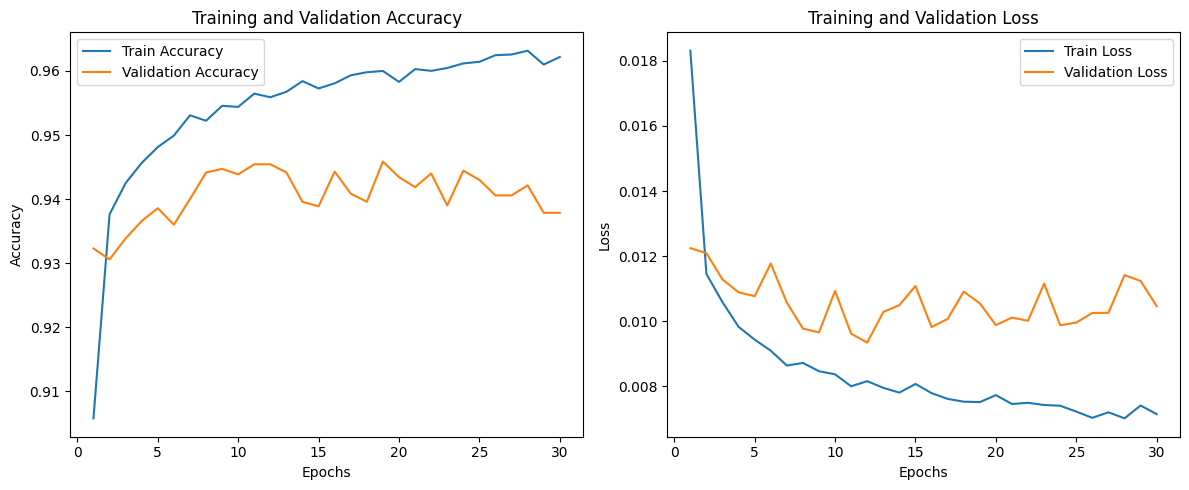

In [30]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [31]:
deep_network.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9439, Test Loss: 0.0091


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

input_size = data_train.shape[1]
output_size = label_train.shape[1]
batch_size = 32
eta = 0.01
nb_epochs = 30

criterion = nn.MSELoss()
deep_network = DeepNetwork(input_size, output_size, hidden_sizes=[512, 256, 128]).to(device)
optimizer = torch.optim.SGD(deep_network.parameters(), lr=eta)

Using device: cuda


In [33]:
train_losses, train_accuracies, val_losses, val_accuracies = deep_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta
)

Epoch 1/20 - Train Loss: 0.0177, Train Acc: 0.9056, Val Loss: 0.0132, Val Acc: 0.9273
Epoch 2/20 - Train Loss: 0.0117, Train Acc: 0.9353, Val Loss: 0.0119, Val Acc: 0.9289
Epoch 3/20 - Train Loss: 0.0109, Train Acc: 0.9396, Val Loss: 0.0112, Val Acc: 0.9353
Epoch 4/20 - Train Loss: 0.0100, Train Acc: 0.9434, Val Loss: 0.0108, Val Acc: 0.9381
Epoch 5/20 - Train Loss: 0.0097, Train Acc: 0.9455, Val Loss: 0.0112, Val Acc: 0.9347
Epoch 6/20 - Train Loss: 0.0095, Train Acc: 0.9461, Val Loss: 0.0113, Val Acc: 0.9369
Epoch 7/20 - Train Loss: 0.0090, Train Acc: 0.9480, Val Loss: 0.0117, Val Acc: 0.9296
Epoch 8/20 - Train Loss: 0.0089, Train Acc: 0.9507, Val Loss: 0.0104, Val Acc: 0.9409
Epoch 9/20 - Train Loss: 0.0088, Train Acc: 0.9514, Val Loss: 0.0093, Val Acc: 0.9460
Epoch 10/20 - Train Loss: 0.0086, Train Acc: 0.9518, Val Loss: 0.0106, Val Acc: 0.9443
Epoch 11/20 - Train Loss: 0.0083, Train Acc: 0.9536, Val Loss: 0.0107, Val Acc: 0.9374
Epoch 12/20 - Train Loss: 0.0084, Train Acc: 0.9533,

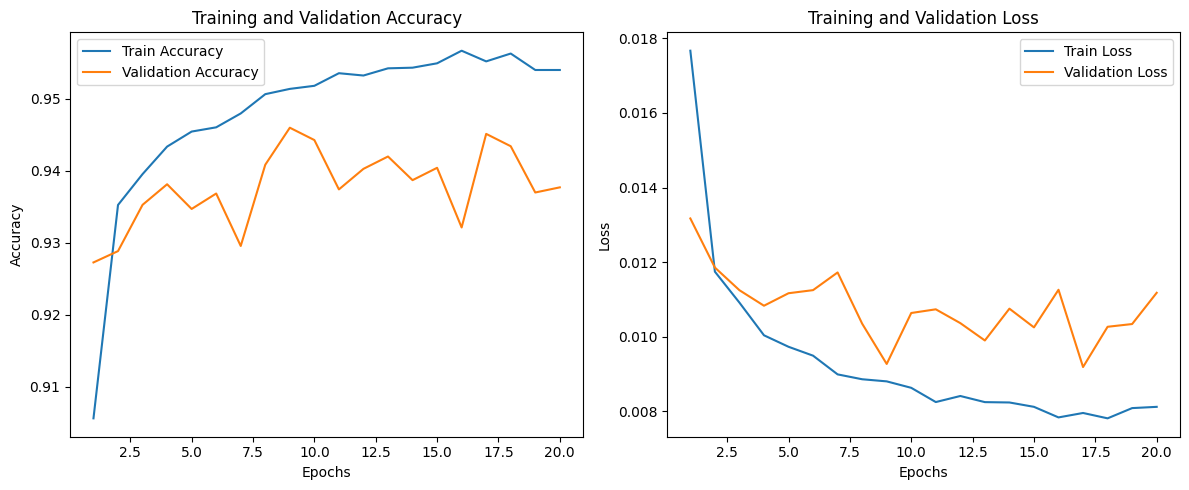

In [34]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [35]:
deep_network.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9436, Test Loss: 0.0102


In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

input_size = data_train.shape[1]
output_size = label_train.shape[1]
batch_size = 32
eta = 0.01
nb_epochs = 30

criterion = nn.CrossEntropyLoss()
deep_network = DeepNetwork(input_size, output_size, hidden_sizes=[512, 256, 128]).to(device)
optimizer = torch.optim.Adam(deep_network.parameters(), lr=eta)

Using device: cuda


In [43]:
train_losses, train_accuracies, val_losses, val_accuracies = deep_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta
)

Epoch 1/30 - Train Loss: 0.3386, Train Acc: 0.9110, Val Loss: 0.2417, Val Acc: 0.9406
Epoch 2/30 - Train Loss: 0.2172, Train Acc: 0.9479, Val Loss: 0.2488, Val Acc: 0.9390
Epoch 3/30 - Train Loss: 0.1920, Train Acc: 0.9551, Val Loss: 0.2698, Val Acc: 0.9496
Epoch 4/30 - Train Loss: 0.1807, Train Acc: 0.9579, Val Loss: 0.2356, Val Acc: 0.9523
Epoch 5/30 - Train Loss: 0.1784, Train Acc: 0.9605, Val Loss: 0.2059, Val Acc: 0.9576
Epoch 6/30 - Train Loss: 0.1552, Train Acc: 0.9654, Val Loss: 0.2086, Val Acc: 0.9521
Epoch 7/30 - Train Loss: 0.1347, Train Acc: 0.9683, Val Loss: 0.1981, Val Acc: 0.9556
Epoch 8/30 - Train Loss: 0.1333, Train Acc: 0.9699, Val Loss: 0.2249, Val Acc: 0.9611
Epoch 9/30 - Train Loss: 0.1267, Train Acc: 0.9720, Val Loss: 0.1876, Val Acc: 0.9657
Epoch 10/30 - Train Loss: 0.1342, Train Acc: 0.9717, Val Loss: 0.2632, Val Acc: 0.9567
Epoch 11/30 - Train Loss: 0.1273, Train Acc: 0.9715, Val Loss: 0.1735, Val Acc: 0.9654
Epoch 12/30 - Train Loss: 0.1353, Train Acc: 0.9719,

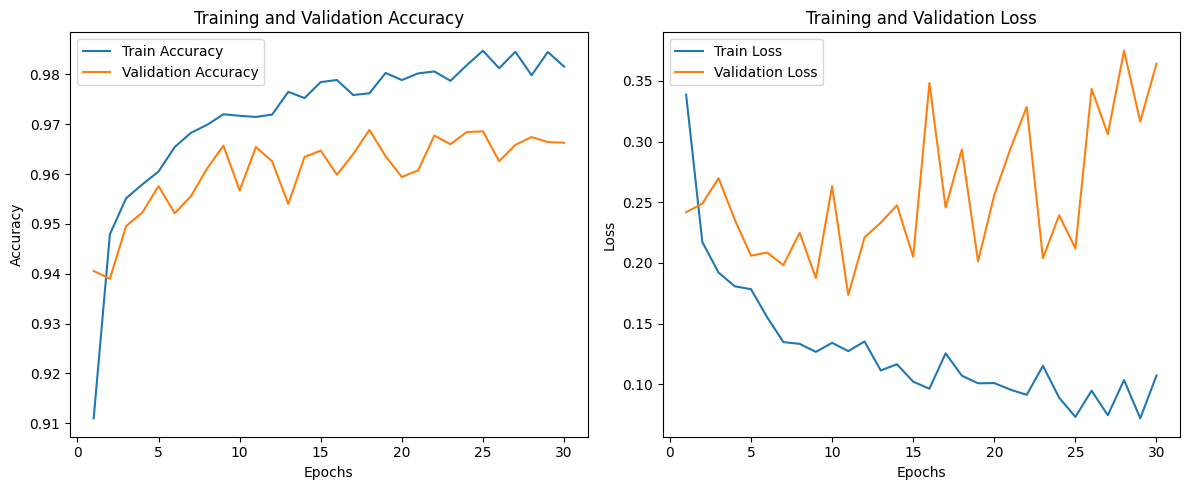

In [44]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [45]:
deep_network.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9684, Test Loss: 0.1955


In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

input_size = data_train.shape[1]
output_size = label_train.shape[1]
batch_size = 32
eta = 0.01
nb_epochs = 30

criterion = nn.CrossEntropyLoss()
deep_network = DeepNetwork(input_size, output_size, hidden_sizes=[512, 256, 128]).to(device)
optimizer = torch.optim.SGD(deep_network.parameters(), lr=eta)

Using device: cuda


In [52]:
train_losses, train_accuracies, val_losses, val_accuracies = deep_network.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta
)

Epoch 1/30 - Train Loss: 0.3401, Train Acc: 0.9069, Val Loss: 0.2608, Val Acc: 0.9363
Epoch 2/30 - Train Loss: 0.2074, Train Acc: 0.9489, Val Loss: 0.2396, Val Acc: 0.9456
Epoch 3/30 - Train Loss: 0.1883, Train Acc: 0.9549, Val Loss: 0.2613, Val Acc: 0.9449
Epoch 4/30 - Train Loss: 0.1677, Train Acc: 0.9597, Val Loss: 0.1858, Val Acc: 0.9561
Epoch 5/30 - Train Loss: 0.1568, Train Acc: 0.9626, Val Loss: 0.1803, Val Acc: 0.9594
Epoch 6/30 - Train Loss: 0.1394, Train Acc: 0.9680, Val Loss: 0.2113, Val Acc: 0.9544
Epoch 7/30 - Train Loss: 0.1362, Train Acc: 0.9684, Val Loss: 0.2058, Val Acc: 0.9576
Epoch 8/30 - Train Loss: 0.1408, Train Acc: 0.9670, Val Loss: 0.1745, Val Acc: 0.9610
Epoch 9/30 - Train Loss: 0.1209, Train Acc: 0.9723, Val Loss: 0.2149, Val Acc: 0.9594
Epoch 10/30 - Train Loss: 0.1192, Train Acc: 0.9734, Val Loss: 0.1947, Val Acc: 0.9597
Epoch 11/30 - Train Loss: 0.1220, Train Acc: 0.9743, Val Loss: 0.2075, Val Acc: 0.9594
Epoch 12/30 - Train Loss: 0.1181, Train Acc: 0.9752,

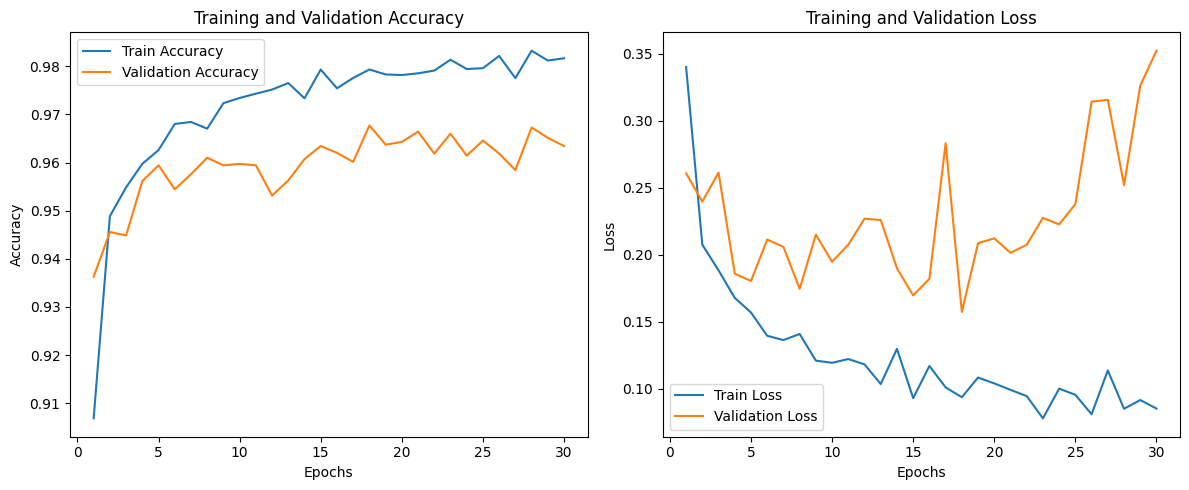

In [53]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [54]:
deep_network.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9647, Test Loss: 0.3016


In [48]:
param_grid = {
    'eta': [0.3,0.01],
    'batch_size': [32,64,96],
    'nb_epochs': [30, 45],
    'hidden_sizes': [[784, 392], [512, 256, 128], [1024, 768, 512, 256, 128]],
    }

deep_network_grid_search = GridSearch(DeepNetwork, param_grid, data_train, label_train, data_validation, label_validation, data_test, label_test, criterion, device, True)
deep_network_grid_search.fit()

Testing model with params : {'eta': 0.3, 'batch_size': 32, 'nb_epochs': 30, 'hidden_sizes': [784, 392]}


KeyboardInterrupt: 

# Part 4: CNN

In [60]:
class CNNNetwork(nn.Module):
    def __init__(self, conv1_params=None, conv2_params=None, fc1_size=128, dropout_rate=0.25):
        super(CNNNetwork, self).__init__()
        conv1_params = conv1_params or {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}
        conv2_params = conv2_params or {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1}

        self.conv1 = nn.Conv2d(1, conv1_params['out_channels'],
                            kernel_size=conv1_params['kernel_size'], 
                            stride=conv1_params['stride'], 
                            padding=conv1_params['padding']
                            )


        self.conv2 = nn.Conv2d(conv1_params['out_channels'], conv2_params['out_channels'],
                            kernel_size=conv2_params['kernel_size'], 
                            stride=conv2_params['stride'], 
                            padding=conv2_params['padding']
                            )

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(dropout_rate)

        self.fc1 = nn.Linear(conv2_params['out_channels'] * 14 * 14, fc1_size)
        self.fc2 = nn.Linear(fc1_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1) # pour applanir le tenseur
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def train_model(
            self, 
            device, 
            data_train, 
            label_train, 
            criterion,
            data_val = None, 
            label_val = None,
            batch_size=64,
            np_epochs=10,
            eta=0.001,
            optimizer=None
        ):

        data_train = data_train.to(device)
        label_train = label_train.to(device)
        if data_val is not None:
            data_val = data_val.to(device)
            label_val = label_val.to(device)

        if optimizer is None:
            optimizer = torch.optim.Adam(self.parameters(), lr=eta)

        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []     

        nb_train = data_train.shape[0]

        for epoch in range(np_epochs):
            permutation = torch.randperm(nb_train, device=device)
            epoch_loss, correct, total = 0.0, 0, 0

            for i in range(0, nb_train, batch_size):
                indices = permutation[i:i+batch_size]
                x_batch = data_train[indices].to(device)
                t_batch = torch.argmax(label_train[indices], dim=1).to(device)

                optimizer.zero_grad()
                y_pred = self.forward(x_batch)
                loss = criterion(y_pred, t_batch)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item() * x_batch.size(0)
                pred = torch.argmax(y_pred, dim=1)
                correct += (pred == t_batch).sum().item()
                total += x_batch.size(0)

            avg_loss = epoch_loss / nb_data_train
            accuracy = correct / total
            train_losses.append(avg_loss)
            train_accuracies.append(accuracy)

            if data_val is not None:
                val_loss, val_acc = self.evaluate_model(device, data_val, label_val, criterion)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)
                print(f"Epoch {epoch+1}/{np_epochs} - "
                      f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
            else:
                print(f"Epoch {epoch+1}/{np_epochs} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}")

        return train_losses, train_accuracies, val_losses, val_accuracies


    def evaluate_model(self, device, data, label, criterion):
        self.eval()
        with torch.no_grad():
            x = data.to(device)
            t = torch.argmax(label, dim=1).to(device)
            y_pred = self.forward(x)
            loss = criterion(y_pred, t).item()
            pred = torch.argmax(y_pred, dim=1)
            acc = (pred == t).sum().item() / data.size(0)
        self.train()
        return loss, acc


    def test_model(self, device, data_test, label_test, criterion):
        loss, acc = self.evaluate_model(device, data_test, label_test, criterion)
        print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")
        return acc, loss

In [56]:
((data_train, label_train), (data_test, label_test)) = torch.load(gzip.open('mnist.pkl.gz'))

data_train = data_train.view(-1, 1, 28, 28).to(device)
data_test = data_test.view(-1, 1, 28, 28).to(device)

val_size = int(0.1 * data_train.shape[0])
data_validation = data_train[-val_size:]
label_validation = label_train[-val_size:]
data_train = data_train[:-val_size]
label_train = label_train[:-val_size]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(f"Train: {data_train.shape}, Val: {data_validation.shape}, Test: {data_test.shape}")

Using device: cuda
Train: torch.Size([56700, 1, 28, 28]), Val: torch.Size([6300, 1, 28, 28]), Test: torch.Size([7000, 1, 28, 28])


In [ ]:
cnn = CNNNetwork(
    conv1_params={'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    conv2_params={'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    fc1_size=128,
    dropout_rate=0.25
).to(device)
criterion = nn.CrossEntropyLoss()
nb_epochs = 7
batch_size = 64
eta = 0.001

In [53]:
train_losses, train_accuracies, val_losses, val_accuracies = cnn.train_model(
    device, data_train, label_train, criterion,
    data_val=data_validation, label_val=label_validation,
    batch_size=batch_size, np_epochs=nb_epochs, eta=eta
)

Epoch 1/10 - Train Loss: 0.1760, Train Acc: 0.9394, Val Loss: 0.0685, Val Acc: 0.9784
Epoch 2/10 - Train Loss: 0.0580, Train Acc: 0.9800, Val Loss: 0.0400, Val Acc: 0.9883
Epoch 3/10 - Train Loss: 0.0412, Train Acc: 0.9857, Val Loss: 0.0383, Val Acc: 0.9878
Epoch 4/10 - Train Loss: 0.0317, Train Acc: 0.9887, Val Loss: 0.0396, Val Acc: 0.9870
Epoch 5/10 - Train Loss: 0.0264, Train Acc: 0.9907, Val Loss: 0.0338, Val Acc: 0.9889
Epoch 6/10 - Train Loss: 0.0241, Train Acc: 0.9916, Val Loss: 0.0363, Val Acc: 0.9902
Epoch 7/10 - Train Loss: 0.0190, Train Acc: 0.9927, Val Loss: 0.0395, Val Acc: 0.9886
Epoch 8/10 - Train Loss: 0.0154, Train Acc: 0.9941, Val Loss: 0.0420, Val Acc: 0.9886
Epoch 9/10 - Train Loss: 0.0156, Train Acc: 0.9941, Val Loss: 0.0364, Val Acc: 0.9910
Epoch 10/10 - Train Loss: 0.0134, Train Acc: 0.9949, Val Loss: 0.0372, Val Acc: 0.9892


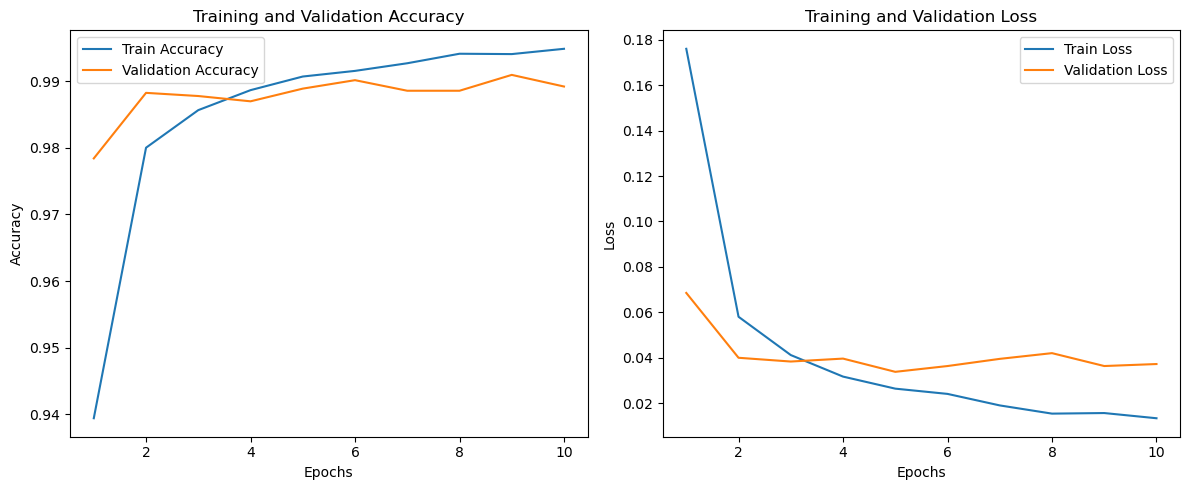

In [54]:
plot_train_val_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses)

In [55]:
cnn.test_model(device, data_test, label_test, criterion)

Test Accuracy: 0.9901, Test Loss: 0.0415


(0.9901428571428571, 0.041454292833805084)

In [ ]:
param_grid = {
    'eta': [0.001, 0.0005],
    'batch_size': [32, 64, 128],
    'nb_epochs': [5, 7, 11],
    'conv1_params': [
        {'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    ],
    'conv2_params': [
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    ],
    'fc1_size': [64, 128],
    'dropout_rate': [0.25, 0.4],
}

cnn_grid_search = GridSearch(
    CNNNetwork,
    param_grid,
    data_train, label_train,
    data_validation, label_validation,
    data_test, label_test,
    nn.CrossEntropyLoss(),
    device,
    showGraph=False
)

cnn_grid_search.fit()


Testing model with params : {'eta': 0.001, 'batch_size': 32, 'nb_epochs': 5, 'conv1_params': {'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}, 'conv2_params': {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}, 'fc1_size': 64, 'dropout_rate': 0.25}
Epoch 1/5 - Train Loss: 0.2207, Train Acc: 0.9248, Val Loss: 0.0700, Val Acc: 0.9781
Epoch 2/5 - Train Loss: 0.0862, Train Acc: 0.9708, Val Loss: 0.0513, Val Acc: 0.9859
Epoch 3/5 - Train Loss: 0.0648, Train Acc: 0.9774, Val Loss: 0.0488, Val Acc: 0.9840
Epoch 4/5 - Train Loss: 0.0553, Train Acc: 0.9804, Val Loss: 0.0408, Val Acc: 0.9886
Epoch 5/5 - Train Loss: 0.0454, Train Acc: 0.9843, Val Loss: 0.0350, Val Acc: 0.9895
0.9895238095238095
{'eta': 0.001, 'batch_size': 32, 'nb_epochs': 5, 'conv1_params': {'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}, 'conv2_params': {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}, 'fc1_size': 64, 'dropout_rate': 0.25}
Testing model with par